In [37]:
target_contracts = [c.lower().strip() for c in input("Target Contracts: ").split(",")]
consumer_contracts = [c.lower().strip() for c in input("Consumer Contracts: ").split(",")]

Target Contracts:  0x16b9a82891338f9bA80E2D6970FddA79D1eb0daE,0xa361433E409Adac1f87CDF133127585F8a93c67d
Consumer Contracts:  0x34Bd6Dba456Bc31c2b3393e499fa10bED32a9370


/usr/local/Cellar/jupyterlab/4.0.10/libexec/bin/python


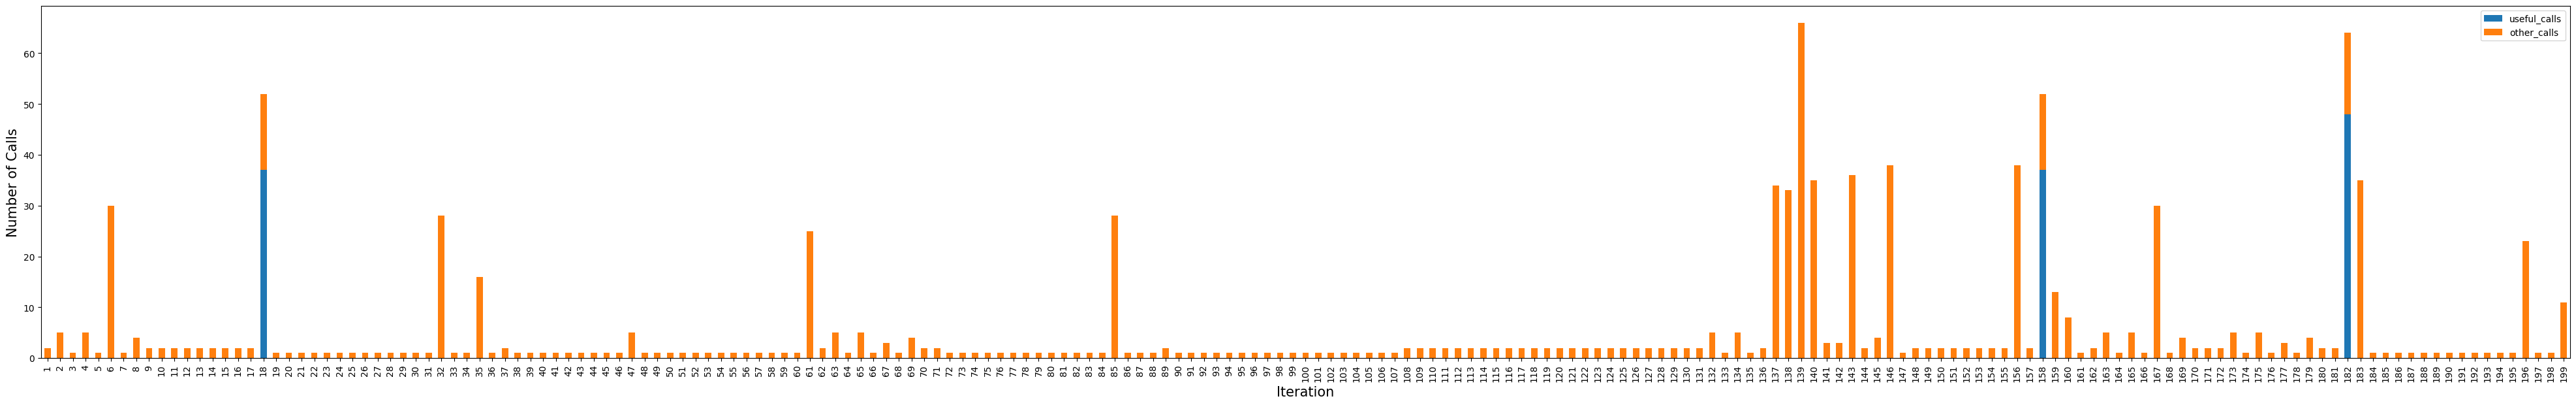

In [72]:
import json
import matplotlib.pyplot as plt
import pandas as pd

contract_data = {'index': [], 'useful_calls':[], 'other_calls':[]}


for i in range(1, 200):
    with open('./edg_finance_results/work_dir/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = len(data)
        useful_calls = 0
        index = 0
        while index < total_calls - 1:
            current_call = data[index][1]["contract"]
            #print(current_call)
            #print(target_contracts_set)
            if current_call in target_contracts_set:
                target_contracts_set.remove(current_call)
            if len(target_contracts_set) == 0:
                useful_calls = total_calls - index
                break
            index += 1
        contract_data['index'].append(i)
        contract_data['useful_calls'].append(useful_calls)
        contract_data['other_calls'].append(total_calls - useful_calls)

df = pd.DataFrame(data = contract_data)
ax = df.set_index('index').plot.bar(stacked=True, figsize=(50, 7))
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Number of Calls", fontsize=15)
plt.show()